# Random Forest - Classification

Pentru partea practică de clasificare utilizând Random Forest o să începem cu același set de date, și anume cu informațiile despre pinguini. O să utilizăm și un set de date mai mare pentru a putea modifica hyperparametrii specifici acestui model de Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [6]:
y = df['species']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Totul este ca și până acuma, ce trebuie să facem acuma este să importăm modelul. Modelul de RandomForestClassifier se găsește în sklearn.ensemble, deoarece este un model care utilizează mai multe modele de Machine Learning (utilizează mai mulți Decision Tree)

In [9]:
from sklearn.ensemble import RandomForestClassifier

O să creem un model de Random Forest și o să stabilim pentru început doi hyperparametrii, n_estimators și max_features. Pentru început o să trecem la n_estimators un număr mic (10) pentru a vedea cum anume modifică acest hyperparametru calitatea modelului. Pentru max_features, aici avem mai multe opțiuni. Putem să îi specificăm ca și valoare un integer care o să reprezinte numărul de features ce o să îl ia în considerare la fiecare Splitting. Mai pavem opțiunea de a selecta ca și valoare 'auto' sau 'sqrt', care ambele o să ia ca și numărul de feature sqrt(N). Aceasta este valoarea default setată. Putem să selectăm și opțiunea de 'log' prin care o să se folosească ecuația log2(N). De asemenea se paote selecta opțiunea de None unde o să se ia în calcul toate features la fiecare split

In [11]:
model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

Prin acel random state precizăm rădăcina algoritmului de clasificare pentru selecția random a features. Se va utiliza doar atunci când dorim să vedem diferența de performanță în momentul în care se modifică hyperparametrii.

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
y_preds = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


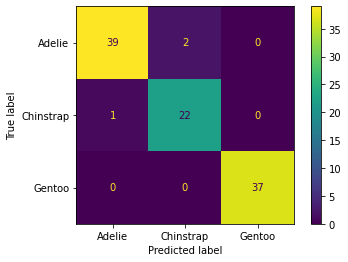

In [16]:
plot_confusion_matrix(model, X_test, y_test)

## Recapitulare

În cadrul acestei lecții am învățat:

    1. De unde importăm modelul de RandomForestClassifier

        from sklearn.ensemble import RandomForestClassifier

    2. Cum să creem un model de Random Forest

        model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

        max_features = numărul de features care să fie luat în considerare la fiecare splitting

            poate avea valorile: int, 'auto', 'sqrt', 'log2', None